**Explication de la variable sortie binaire NTLBIN**

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm


In [91]:
data=pd.read_csv('datafinbrutes.csv')
data=data.drop('N TL',axis=1)
data=data.drop('COM',axis=1)
data=data.drop('Nom Commune',axis=1)

In [92]:
numerical_data = data.select_dtypes(exclude=['object'])
correlations = numerical_data.corr()['NTLBIN']
#print(correlations)
threshold = 0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à 0.3 :
P20_SCOL1517           0.369496
ETTEF2021              0.320979
P20_NSCOL15P_CAPBEP    0.415408
P20_NSCOL15P_BAC       0.369328
P20_NSCOL15P_SUP2      0.344966
P20_NSCOL15P_SUP34     0.301392
ETTEF5021              0.314096
ETTEF1021              0.316242
ETTEF121               0.321291
ETTEF021               0.307884
P20_POP1564            0.321130
P20_ACT1564            0.324934
P20_ACTOCC1564         0.322718
P20_CHOMEUR1564        0.332182
P20_CHOM_DIPLMIN       0.348797
P20_ACT_DIPLMIN        0.366116
P20_INACT1564          0.307981
P20_RETR1564           0.403362
P20_AINACT1564         0.354637
C20_ACT1564_CS2        0.332032
C20_ACT1564_CS4        0.312003
NBPERSMENFISC20        0.352502
NTLBIN                 1.000000
SumOfNB_EQUIP          0.434099
Name: NTLBIN, dtype: float64


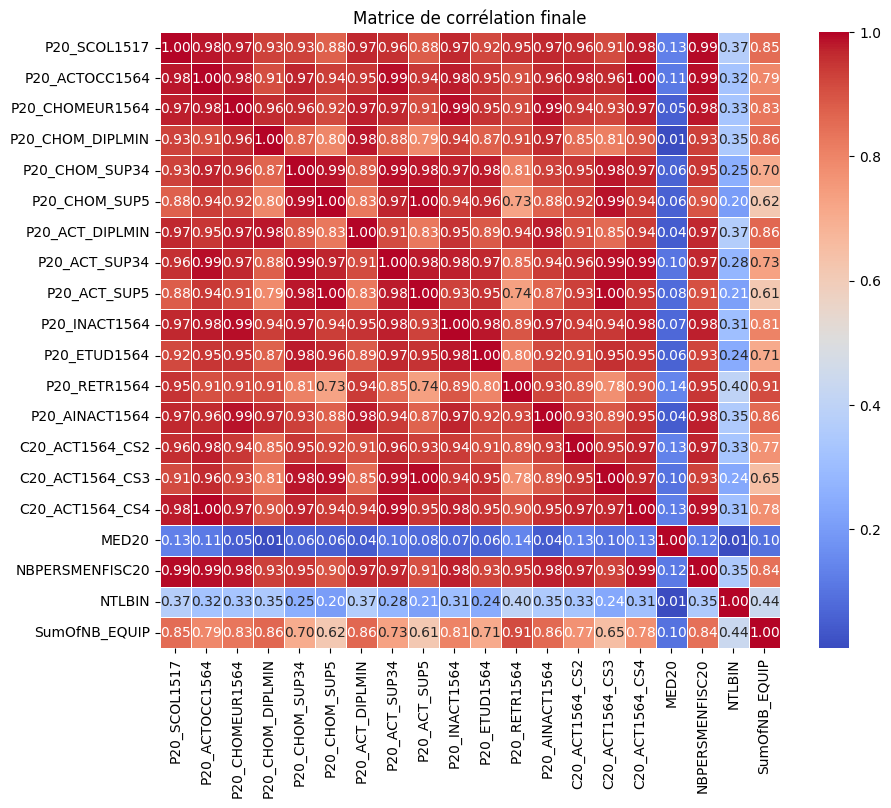

In [101]:
numerical_data = data.select_dtypes(exclude=['object'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Boucle jusqu'à ce qu'il n'y ait plus de corrélations supérieures à 0.90
while True:
    # Trouver les paires de variables fortement corrélées
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    high_corr = (upper > 0.999).any()
    
    # Sortir de la boucle si aucune corrélation supérieure à 0.90 n'est trouvée
    if not high_corr.any():
        break

    # Identifier la première variable corrélée
    first_high_corr = high_corr.index[high_corr.argmax()]
    
    # Identifier les variables corrélées avec la première variable
    corr_with_first = correlation_matrix[first_high_corr][correlation_matrix[first_high_corr] > 0.1].index.tolist()

    # Supprimer une des variables corrélées
    numerical_data.drop(corr_with_first[1], axis=1, inplace=True)

    # Recalculer la matrice de corrélation
    correlation_matrix = numerical_data.corr()
# Tracer la matrice de corrélation finale avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation finale")
plt.show()


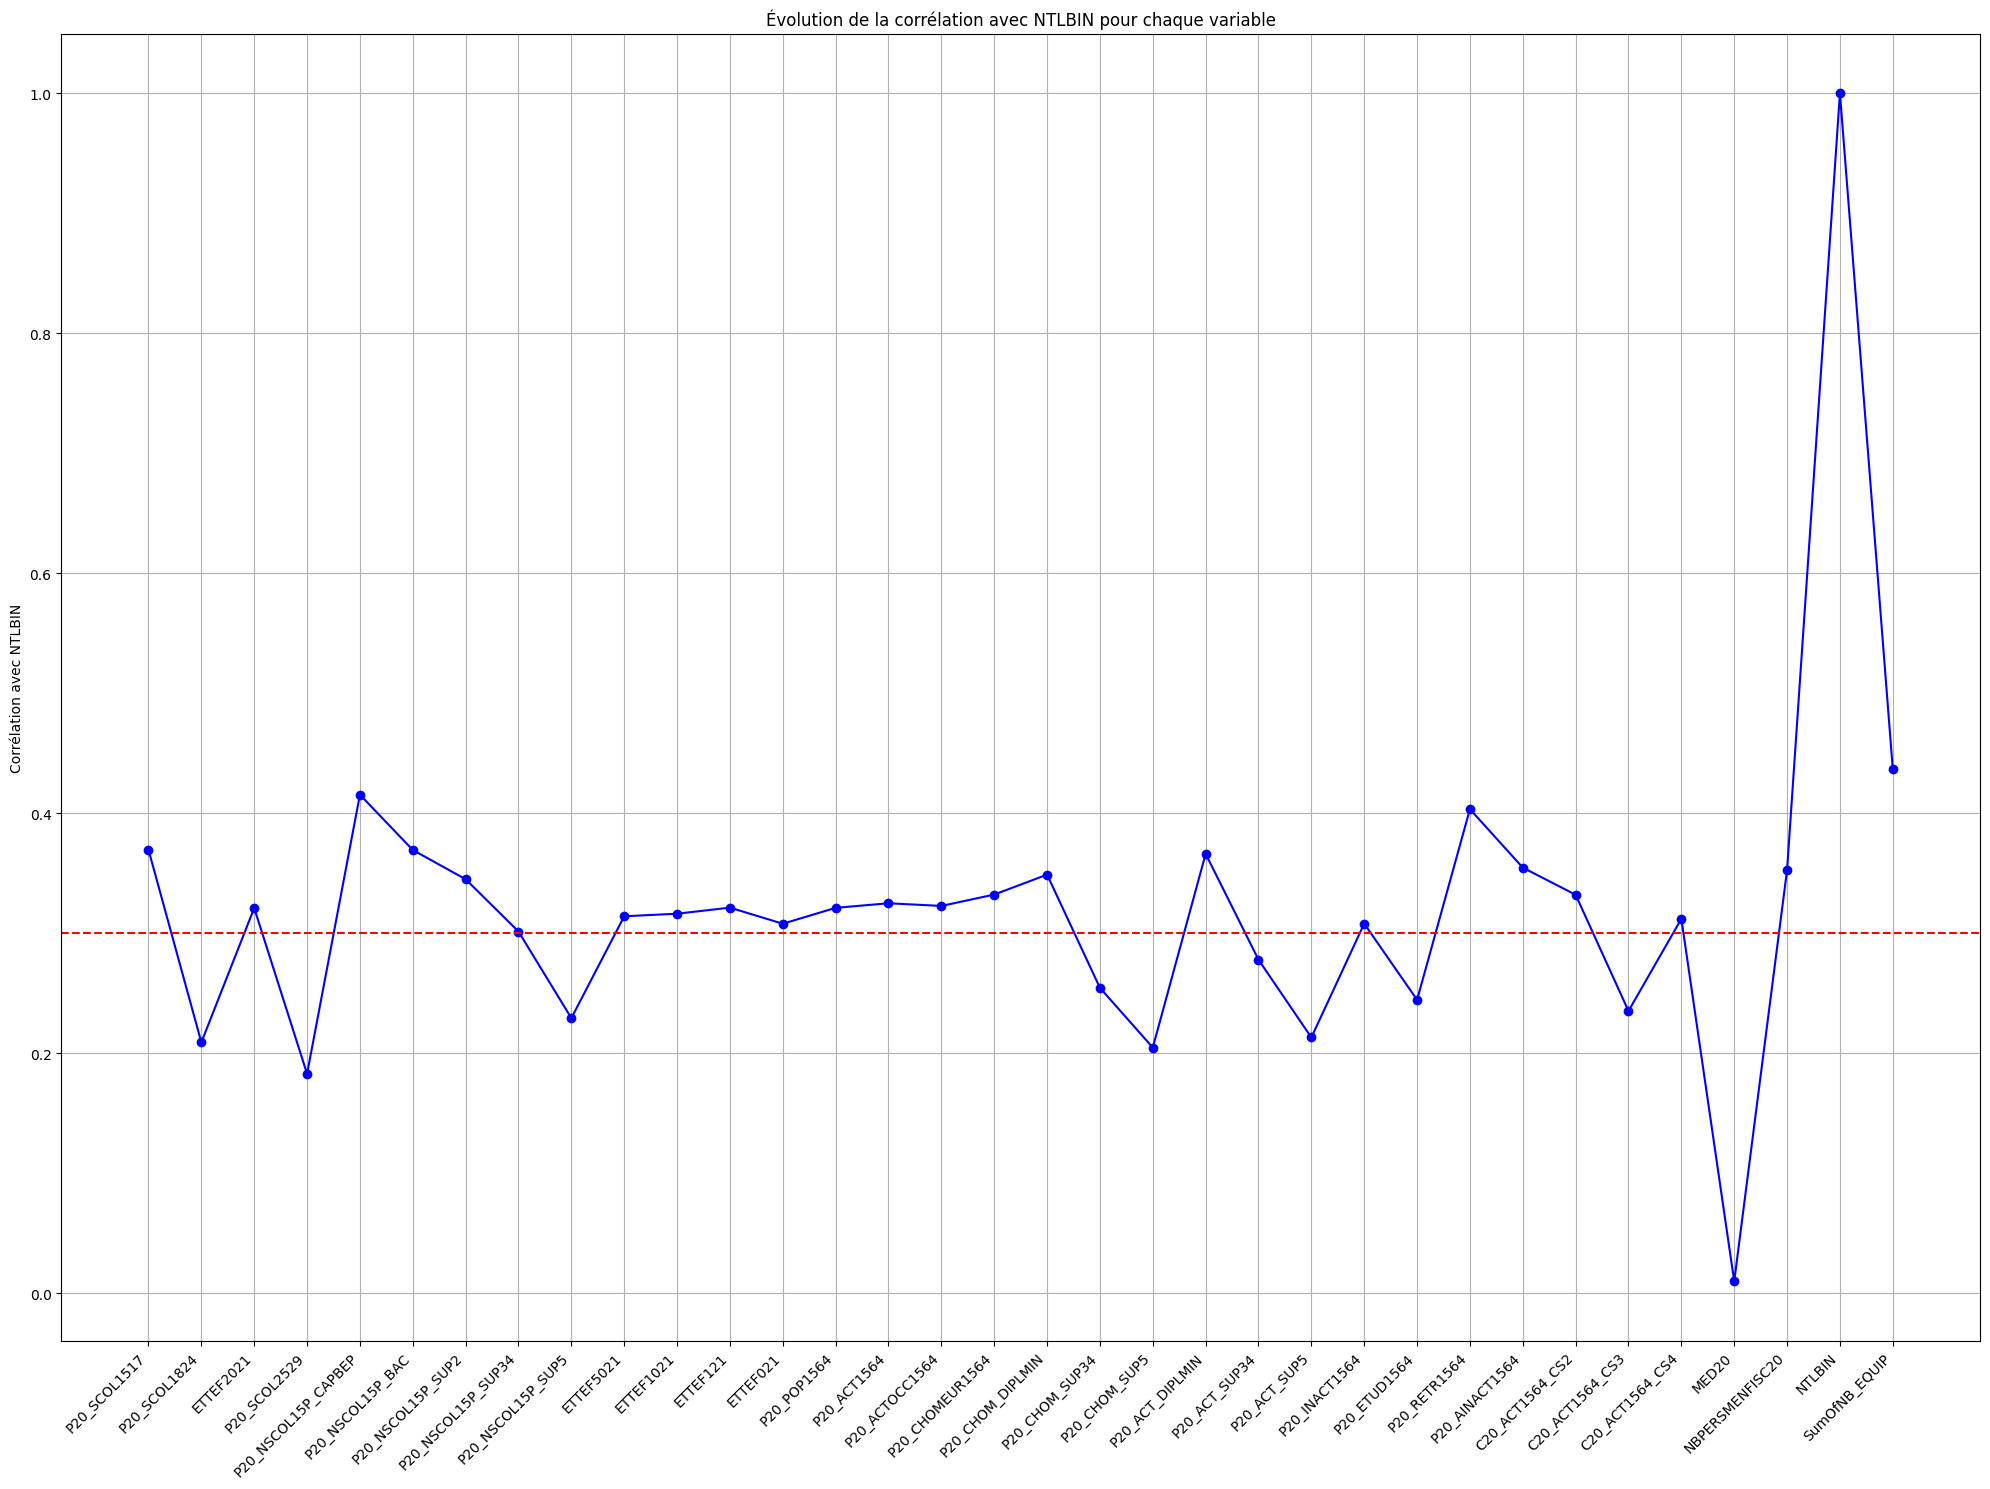

In [102]:


#correlation_df = pd.DataFrame(correlations.values(), index=correlations.keys(), columns=['Corrélation'])

# Assurez-vous que l'index est au bon format (si nécessaire)
# correlation_df.index = pd.to_datetime(correlation_df.index)

# Tracez le graphique de l'évolution de la corrélation au fil du temps
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


In [103]:
median_values = data.select_dtypes(include=np.number).median()


data.fillna(median_values, inplace=True)

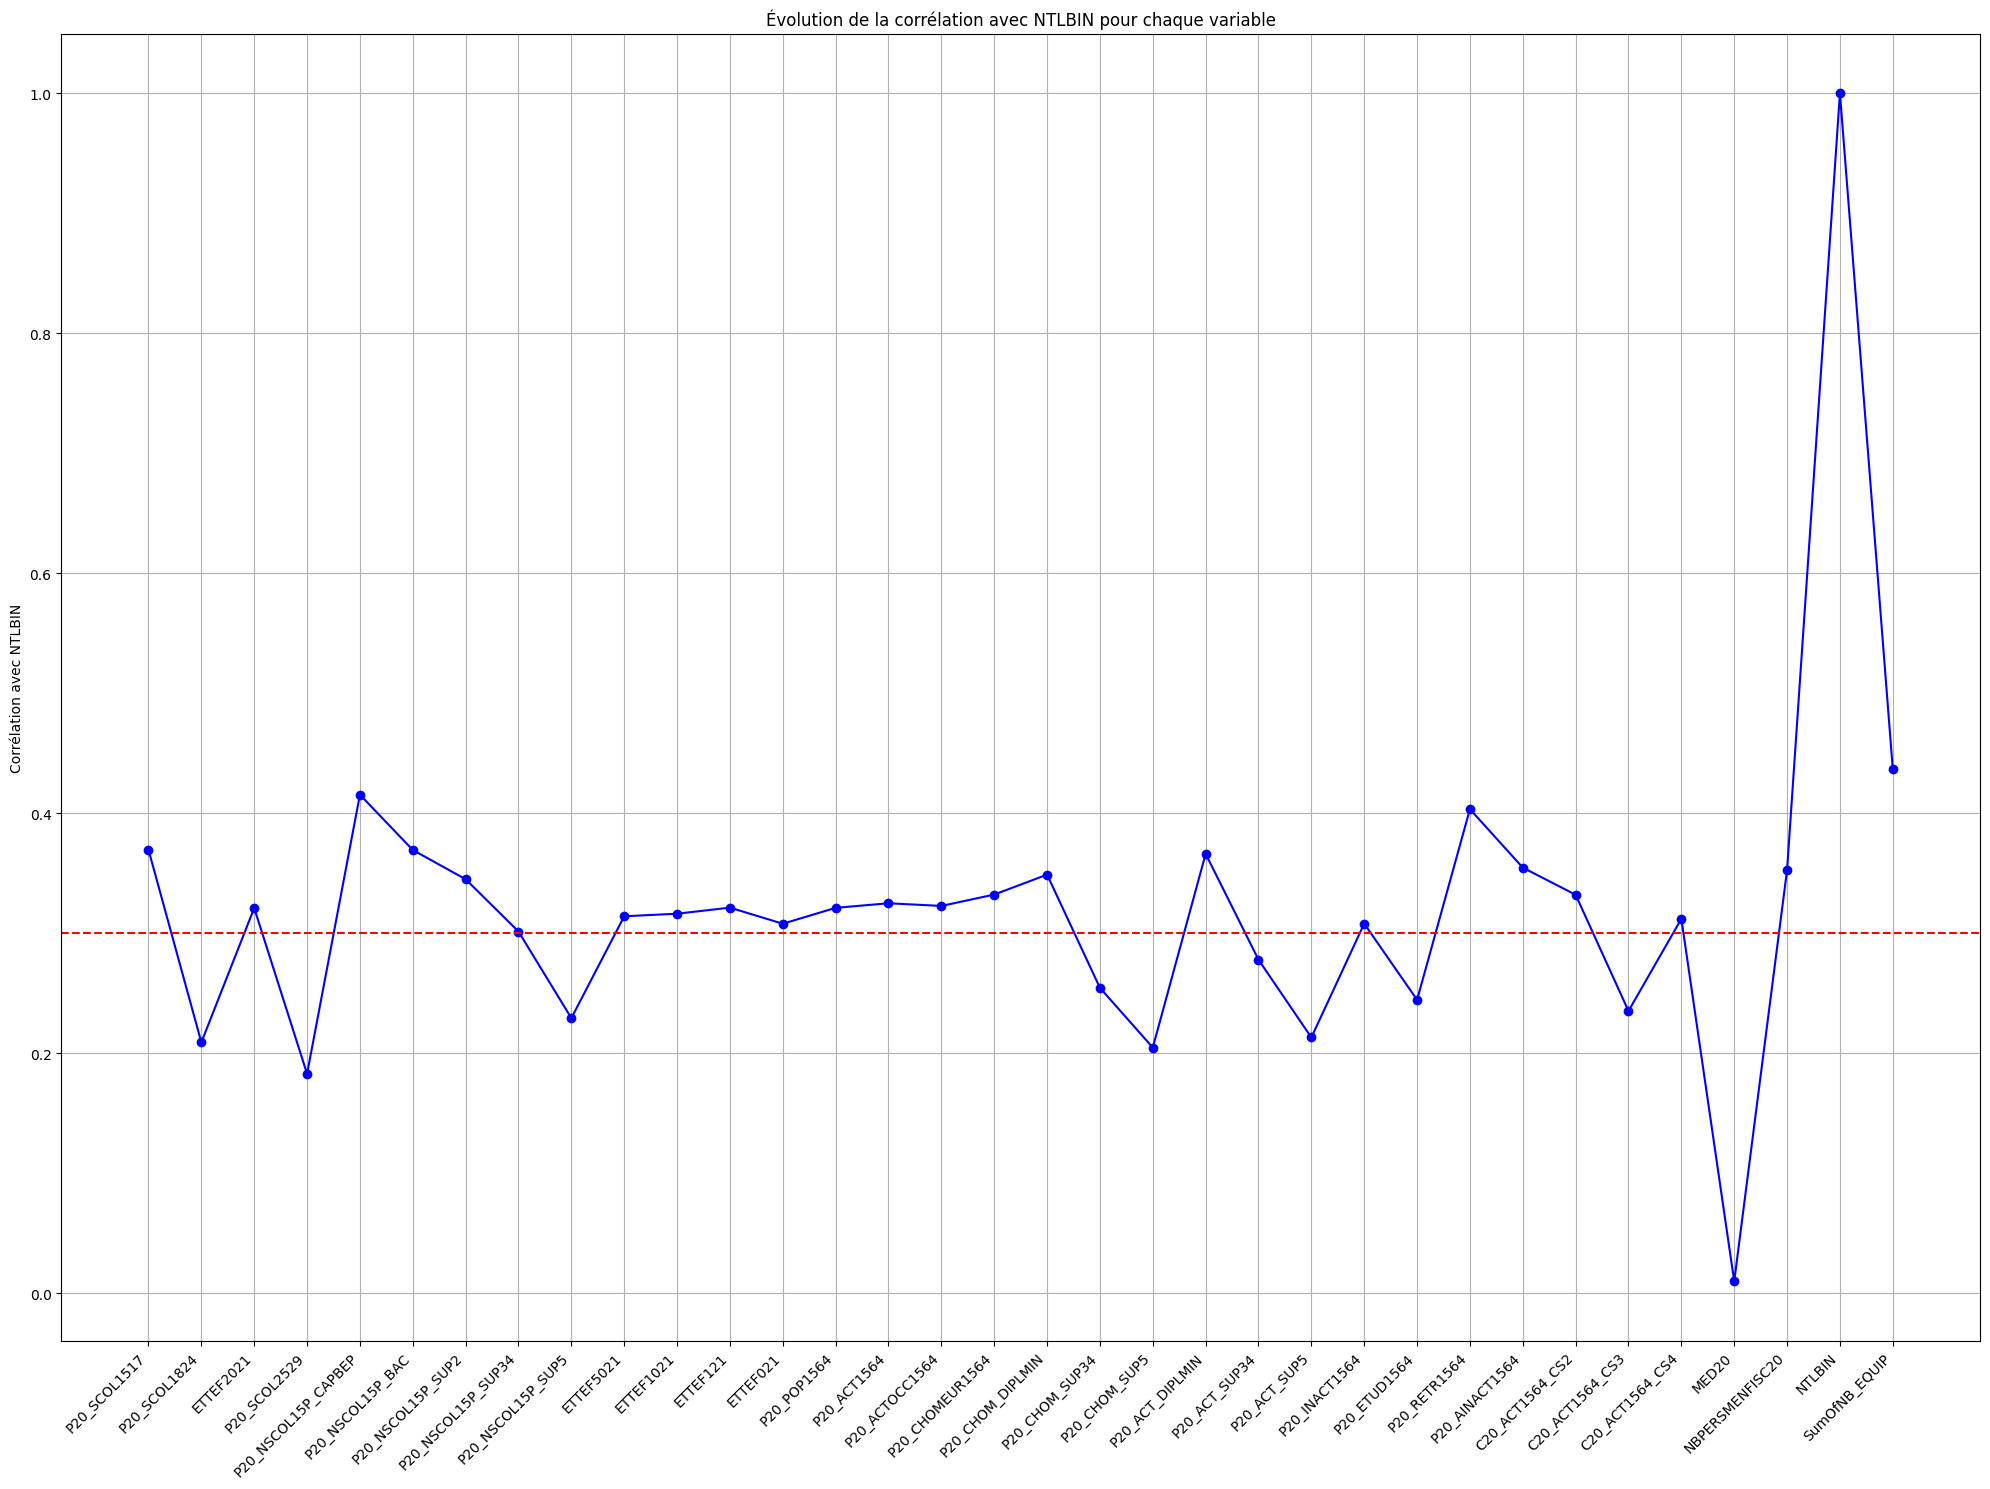

In [96]:
numerical_data = data.select_dtypes(exclude=['object'])
correlations = numerical_data.corr()['NTLBIN']
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()

In [104]:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data.drop(columns=['NTLBIN'])
def calculate_vif(X):
    #X = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialiser X avec vos données (sans la variable cible)


# Calculer les VIF initiaux
vif_data = calculate_vif(X)
print(vif_data)

# Boucle pour supprimer les variables avec VIF très élevés
high_vif_threshold = 10
while vif_data['VIF'].max() > high_vif_threshold:
    # Trouver la variable avec le VIF le plus élevé
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]  # Ignorer la constante
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    
    # Supprimer cette variable de X
    X = X.drop(columns=[max_vif_variable])
    
    # Recalculer les VIF
    vif_data = calculate_vif(X)
    print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


               Variable          VIF
0          P20_SCOL1517   501.138655
1          P20_SCOL1824  2939.612136
2             ETTEF2021    97.405479
3          P20_SCOL2529   261.238929
4   P20_NSCOL15P_CAPBEP   600.957802
5      P20_NSCOL15P_BAC   649.830693
6     P20_NSCOL15P_SUP2   652.874252
7    P20_NSCOL15P_SUP34  3453.909978
8     P20_NSCOL15P_SUP5  6388.926560
9             ETTEF5021    59.671001
10            ETTEF1021   143.984535
11             ETTEF121   218.756358
12             ETTEF021    28.661379
13          P20_POP1564          inf
14          P20_ACT1564          inf
15       P20_ACTOCC1564          inf
16      P20_CHOMEUR1564          inf
17     P20_CHOM_DIPLMIN   250.078218
18       P20_CHOM_SUP34   404.925123
19        P20_CHOM_SUP5   488.153879
20      P20_ACT_DIPLMIN   286.383276
21        P20_ACT_SUP34  3912.367768
22         P20_ACT_SUP5  6950.936753
23        P20_INACT1564          inf
24         P20_ETUD1564          inf
25         P20_RETR1564          inf
2

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


               Variable           VIF
0          P20_SCOL1517  5.011387e+02
1          P20_SCOL1824  2.939612e+03
2             ETTEF2021  9.740548e+01
3          P20_SCOL2529  2.612389e+02
4   P20_NSCOL15P_CAPBEP  6.009578e+02
5      P20_NSCOL15P_BAC  6.498307e+02
6     P20_NSCOL15P_SUP2  6.528743e+02
7    P20_NSCOL15P_SUP34  3.453910e+03
8     P20_NSCOL15P_SUP5  6.388927e+03
9             ETTEF5021  5.967100e+01
10            ETTEF1021  1.439845e+02
11             ETTEF121  2.187564e+02
12             ETTEF021  2.866138e+01
13          P20_POP1564           inf
14          P20_ACT1564           inf
15       P20_ACTOCC1564  3.336950e+04
16     P20_CHOM_DIPLMIN  2.500782e+02
17       P20_CHOM_SUP34  4.049251e+02
18        P20_CHOM_SUP5  4.881539e+02
19      P20_ACT_DIPLMIN  2.863833e+02
20        P20_ACT_SUP34  3.912368e+03
21         P20_ACT_SUP5  6.950937e+03
22        P20_INACT1564           inf
23         P20_ETUD1564           inf
24         P20_RETR1564           inf
25       P20

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


               Variable           VIF
0          P20_SCOL1517  5.011387e+02
1          P20_SCOL1824  2.939612e+03
2             ETTEF2021  9.740548e+01
3          P20_SCOL2529  2.612389e+02
4   P20_NSCOL15P_CAPBEP  6.009578e+02
5      P20_NSCOL15P_BAC  6.498307e+02
6     P20_NSCOL15P_SUP2  6.528743e+02
7    P20_NSCOL15P_SUP34  3.453910e+03
8     P20_NSCOL15P_SUP5  6.388927e+03
9             ETTEF5021  5.967100e+01
10            ETTEF1021  1.439845e+02
11             ETTEF121  2.187564e+02
12             ETTEF021  2.866138e+01
13          P20_POP1564           inf
14          P20_ACT1564           inf
15       P20_ACTOCC1564  3.336950e+04
16     P20_CHOM_DIPLMIN  2.500782e+02
17       P20_CHOM_SUP34  4.049251e+02
18        P20_CHOM_SUP5  4.881539e+02
19      P20_ACT_DIPLMIN  2.863833e+02
20        P20_ACT_SUP34  3.912368e+03
21         P20_ACT_SUP5  6.950937e+03
22        P20_INACT1564           inf
23         P20_ETUD1564  4.607081e+03
24         P20_RETR1564  1.396233e+02
25      C20_

In [105]:
colonnes=['P20_SCOL1824','ETTEF021','P20_CHOM_DIPLMIN','MED20','P20_RETR1564','NTLBIN','SumOfNB_EQUIP','ETTEF5021']
newdata=data[colonnes]
X = newdata.drop(columns=['NTLBIN'])

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())

'''0      P20_SCOL1824   6.094365
1          ETTEF021   6.466058
2  P20_CHOM_DIPLMIN  10.505428
3      P20_RETR1564  12.230998
4             MED20   1.895932
5     SumOfNB_EQUIP   9.122731
'''

Optimization terminated successfully.
         Current function value: 0.137287
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4308
Model:                          Logit   Df Residuals:                     4301
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Jun 2024   Pseudo R-squ.:                  0.2552
Time:                        18:03:59   Log-Likelihood:                -591.43
converged:                       True   LL-Null:                       -794.09
Covariance Type:            nonrobust   LLR p-value:                 2.019e-84
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
P20_SCOL1824        -0.0003      0.000     -1.648      0.099      -0.001    6.34e-05
ETTEF021   

'0      P20_SCOL1824   6.094365\n1          ETTEF021   6.466058\n2  P20_CHOM_DIPLMIN  10.505428\n3      P20_RETR1564  12.230998\n4             MED20   1.895932\n5     SumOfNB_EQUIP   9.122731\n'

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


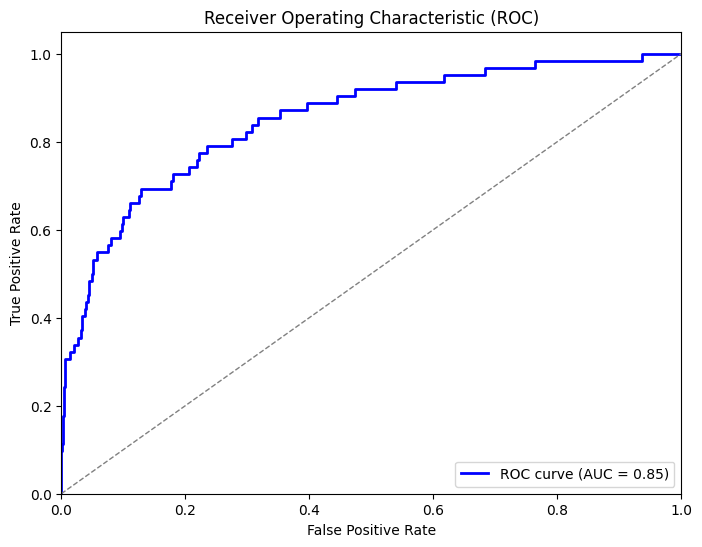

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[815   5]
 [ 33   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       820
           1       0.64      0.21      0.32        42

    accuracy                           0.96       862
   macro avg       0.80      0.60      0.65       862
weighted avg       0.95      0.96      0.95       862


Accuracy Score:
0.9559164733178654


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[815   5]
 [ 33   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       820
           1       0.64      0.21      0.32        42

    accuracy                           0.96       862
   macro avg       0.80      0.60      0.65       862
weighted avg       0.95      0.96      0.95       862


Accuracy Score:
0.9559164733178654
